# Importing file

In [529]:
import pandas as pd
data1=pd.read_excel('service-data.xlsx')

In [532]:
data1.head()

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL


In [533]:
data1.rename(columns={'Invoice Date': 'Invoice_Date', 'Job Card Date': 'Job_Card_Date','Business Partner Name':'Business_Partner_Name','Vehicle No.':'Vehicle_No','Vehicle Model':'Vehicle_Model','Current KM Reading':'Current_KM_Reading','INVOICE LINE TEXT':'INVOICE_LINE_TEXT'}, inplace=True)

In [534]:
data1.shape

(28484, 7)

In [535]:
data1.dtypes

Invoice_Date             datetime64[ns]
Job_Card_Date            datetime64[ns]
Business_Partner_Name            object
Vehicle_No                       object
Vehicle_Model                    object
Current_KM_Reading              float64
INVOICE_LINE_TEXT                object
dtype: object

In [536]:
data1.dropna(how='any',axis=0,inplace=True)

In [537]:
data1.isnull().sum()

Invoice_Date             0
Job_Card_Date            0
Business_Partner_Name    0
Vehicle_No               0
Vehicle_Model            0
Current_KM_Reading       0
INVOICE_LINE_TEXT        0
dtype: int64

# Deleting unwanted row

In [538]:
data1.drop(['Job_Card_Date','Vehicle_No','Business_Partner_Name'],axis=1,inplace=True)

In [539]:
data1.head()

,Invoice_Date,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT
0,2017-05-30,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,BAJAJ PULSAR NS 200,758.0,COOLANT OIL


# Making separate coulmns for year,month,day of year and weekday

In [540]:
data1['year']=data1['Invoice_Date'].dt.year
data1['month']=data1['Invoice_Date'].dt.month
data1['day']=data1['Invoice_Date'].dt.dayofyear
data1['weekday']=data1['Invoice_Date'].dt.weekday

In [541]:
import matplotlib
import matplotlib.pyplot as plt

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

### Saturday has high number of purchase

C:\Users\sony\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0.5,0,'weekday')

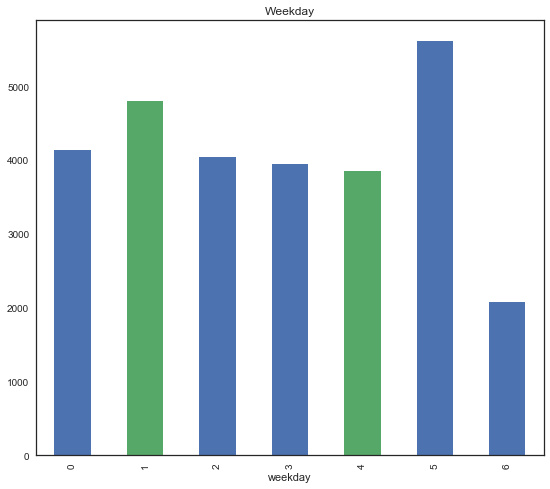

In [542]:
plt.figure(figsize=(20,8))

#pp.subplot(1,2,1);data1.INVOICE_LINE_TEXT.value_counts(normalize=True).plot(kind='line', colors=['C0', 'C1']); pp.title('INVOICE_LINE_TEXT')
plt.subplot(1,2,1);data1.weekday.value_counts().sort_index(ascending = True).plot(kind='bar', colors=['C0', 'C1']); plt.title('Weekday')
plt.xlabel('weekday')

### Dcember has highest number of sale

C:\Users\sony\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0.5,0,'month')

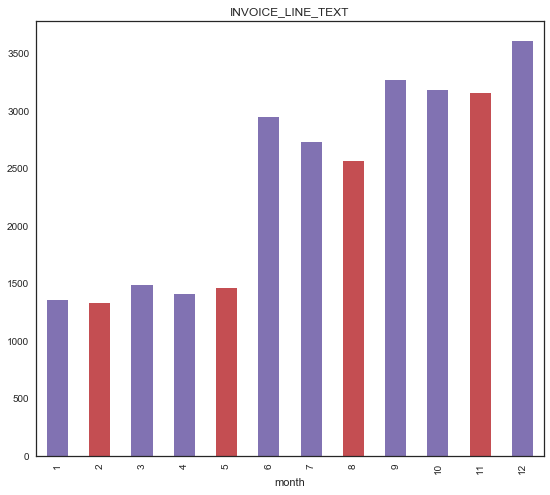

In [543]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1);data1.month.value_counts().sort_index(ascending = True).plot(kind='bar', colors=['C3', 'C2']); plt.title('INVOICE_LINE_TEXT')
plt.xlabel('month')

In [544]:
year_invoice = pd.crosstab(index = data1["year"],  # Make a crosstab
                              columns="INVOICE_LINE_TEXT",normalize=True)      # Name the count column

year_invoice

col_0,INVOICE_LINE_TEXT
year,
2017,0.300162
2018,0.687500
2019,0.012338


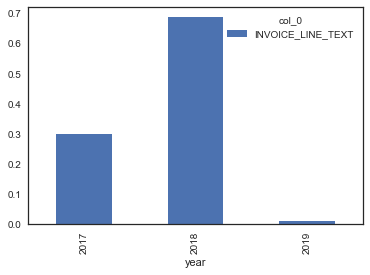

In [545]:
year_invoice.plot.bar()

### Weekday vs INVOICE_LINE_TEXT

In [546]:
weekday_invoice = pd.crosstab(index = data1["weekday"],  # Make a crosstab
                              columns="INVOICE_LINE_TEXT",normalize=True)      # Name the count column

weekday_invoice

col_0,INVOICE_LINE_TEXT
weekday,
0,0.145423
1,0.168518
2,0.141873
3,0.138744
4,0.135335
5,0.197237
6,0.072870


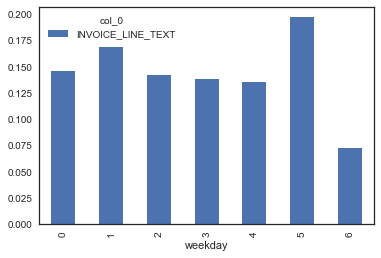

In [547]:
weekday_invoice.plot.bar()

### Vehicle_Model vs INVOICE_LINE_TEXT

In [548]:
weekday_invoice = pd.crosstab(index = data1["Vehicle_Model"],  # Make a crosstab
                              columns="INVOICE_LINE_TEXT",normalize=True)      # Name the count column

weekday_invoice

col_0,INVOICE_LINE_TEXT
Vehicle_Model,
BAJAJ AVENGER STREET,0.039054
BAJAJ AVENGER STREET 180,0.004289
BAJAJ AVENGER STREET 220,0.148060
BAJAJ BOXER CT,0.000141
BAJAJ CALIBER,0.001406
BAJAJ CT 100,0.050337
BAJAJ DISCOVER,0.023833
BAJAJ DISCOVER 125,0.047279
BAJAJ DISCOVER 135,0.004042


<Figure size 1440x576 with 0 Axes>

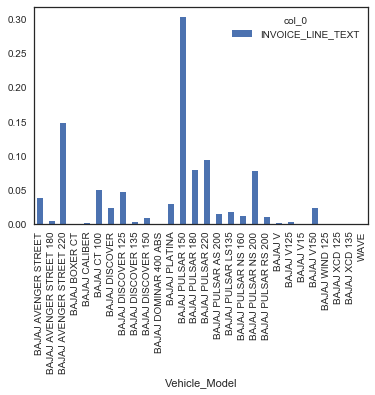

In [549]:
plt.figure(figsize=(20,8))
weekday_invoice.plot.bar()

### Current_KM_Reading vs INVOICE_LINE_TEXT

In [550]:
week_invoice = pd.crosstab(index = data1["Current_KM_Reading"],  # Make a crosstab
                              columns="INVOICE_LINE_TEXT",normalize=True)      # Name the count column

week_invoice

col_0,INVOICE_LINE_TEXT
Current_KM_Reading,
0.0,0.029563
1.0,0.000562
2.0,0.001547
3.0,0.000668
4.0,0.000738
5.0,0.000211
50.0,0.000176
62.0,0.000105
71.0,0.000141


# Label encoding

In [551]:
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
Vehicle_Model=data1['Vehicle_Model'].unique().tolist()
le.fit(Vehicle_Model)
LabelEncoder()
le.transform(Vehicle_Model) 
Vehicle_Model_enc = dict(zip(le.classes_, np.arange(len(le.classes_))))

In [552]:
Vehicle_Model_enc

{'BAJAJ AVENGER STREET': 0,
 'BAJAJ AVENGER STREET 180': 1,
 'BAJAJ AVENGER STREET 220': 2,
 'BAJAJ BOXER CT': 3,
 'BAJAJ CALIBER': 4,
 'BAJAJ CT 100': 5,
 'BAJAJ DISCOVER': 6,
 'BAJAJ DISCOVER 125': 7,
 'BAJAJ DISCOVER 135': 8,
 'BAJAJ DISCOVER 150': 9,
 'BAJAJ DOMINAR 400 ABS': 10,
 'BAJAJ PLATINA': 11,
 'BAJAJ PULSAR 150': 12,
 'BAJAJ PULSAR 180': 13,
 'BAJAJ PULSAR 220': 14,
 'BAJAJ PULSAR AS 200': 15,
 'BAJAJ PULSAR LS135': 16,
 'BAJAJ PULSAR NS 160': 17,
 'BAJAJ PULSAR NS 200': 18,
 'BAJAJ PULSAR RS 200': 19,
 'BAJAJ V': 20,
 'BAJAJ V125': 21,
 'BAJAJ V15': 22,
 'BAJAJ V150': 23,
 'BAJAJ WIND 125': 24,
 'BAJAJ XCD 125': 25,
 'BAJAJ XCD 135': 26,
 'WAVE': 27}

In [553]:
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
INVOICE_LINE_TEXT=data1['INVOICE_LINE_TEXT'].unique().tolist()
le.fit(INVOICE_LINE_TEXT)
LabelEncoder()
le.transform(INVOICE_LINE_TEXT) 
INVOICE_LINE_TEXT_Model_enc = dict(zip(le.classes_, np.arange(len(le.classes_))))

In [554]:
INVOICE_LINE_TEXT_Model_enc

{'10 SIZE NUT': 0,
 '12 SIZE BOLT': 1,
 '3M OIL': 2,
 '4 WAY SWITCH': 3,
 '6004 BEARING': 4,
 '6202 BEARING': 5,
 '6303 BEARING': 6,
 '8 SIZE BOLT': 7,
 'ACCELATOR CABLE': 8,
 'ADD ON FEES': 9,
 'AIR FILTER': 10,
 'AIR FILTER CHECKUP': 11,
 'AIR INTAKE': 12,
 'AXLE': 13,
 'BALANCING GEAR': 14,
 'BATTERY': 15,
 'BATTERY BELT': 16,
 'BATTERY CHARGE': 17,
 'BATTERY CLIP': 18,
 'BATTERY TARMINAL': 19,
 'BC UNIT': 20,
 'BEARING': 21,
 'BEARING SET': 22,
 'BEARING WIELDING': 23,
 'BEDDING BOLT': 24,
 'BODY ': 25,
 'BODY COVER': 26,
 'BOLT REMOVAL': 27,
 'BOLT WIELDING': 28,
 'BORE': 29,
 'BORE GASKET': 30,
 'BORE KIT': 31,
 'BOTTLE COIL': 32,
 'BRAKE ADJUSTMENT': 33,
 'BRAKE BUSH KIT': 34,
 'BRAKE CABLE': 35,
 'BRAKE LEVER': 36,
 'BRAKE LIGHT SPRING': 37,
 'BRAKE LIGHT SWITCH': 38,
 'BRAKE LIGHT SWITCH ': 39,
 'BRAKE PEDAL': 40,
 'BRAKE PEDAL RUBBER': 41,
 'BRAKE PEDAL SPRING': 42,
 'BRAKE ROD': 43,
 'BRAKE ROD SPRING': 44,
 'BRAKE RUBBER': 45,
 'BRAKE SHOE': 46,
 'BRAKE SWITCH': 47,
 'BULB'

In [555]:
data1['Vehicle_Model'] = le.fit_transform(data1['Vehicle_Model'])
data1['INVOICE_LINE_TEXT'] = le.fit_transform(data1['INVOICE_LINE_TEXT'])

In [556]:
data1.to_csv('Inventory_label.csv')